<a href="https://colab.research.google.com/github/mondalso/HouseSalesInKingCountry/blob/main/KingCountyHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **H20 AutoML House Sales in King County, USA Regression**

# Abstract

A lot of consideration and study must go into the major choice of a person's life—buying a home. One wants to purchase a home at the best price with the least amount of risk and with the expectation that it will be the best investment going forward. Home buyers may compare several residences that are for sale thanks to a number of internet resources, real estate professionals, and realtors. In addition to assisting the consumer in choosing the ideal time to buy a home, house price prediction may assist the developer in determining the selling price of a home. Three elements, including a house's physical state, design, and location, all have an impact on its price. The aim of the Notebook is to predict the prices of houses in King County. Selecting the key variables that influence house prices should come first. Then, using linear regression, a model for predicting house prices should be developed. To test the model, that ought to be applied to the King Sales housing dataset. It may be concluded from the data analysis and test that the linear regression model can, to a certain extent, forecast and assess the housing price, but that the algorithm can still be improved using more sophisticated machine learning techniques.

# Dataset

The data set consists of :

13 associated characteristics of appointment no shows - PatientId, AppointmentID, Gender, DataMarcacaoConsulta, DataAgendamento, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received - The Independent Variables
The characteristic - No-show is a Dependent Variable.
There are a total of 110,527 observations in the dataset.

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a 
toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and 
design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Dataset : https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

# Importing required Libraries and H20 Initialization

Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems.

H2O AutoML automates the steps like basic data processing, model training and tuning, Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [3]:

import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [4]:
min_mem_size=6 
run_time=222

In [5]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [6]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)
     

Checking whether there is an H2O instance running at http://localhost:51417..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmy1b9fyl
  JVM stdout: /tmp/tmpmy1b9fyl/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmy1b9fyl/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:51417
Connecting to H2O server at http://127.0.0.1:51417 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_1l2t6n
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:51417
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  ----------------------------------

H2O initialization is complete.

# Importing Data

In [7]:
url = "https://github.com/mondalso/HouseSalesInKingCountry/blob/main/kc_house_data.csv?raw=true"
df = h2o.import_file(path = url)

dff = pd.read_csv("https://github.com/mondalso/HouseSalesInKingCountry/blob/main/kc_house_data.csv?raw=true", on_bad_lines='skip')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
dff.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [9]:

dff.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

Plotting interactive map to undestand the location of the houses on the map

In [10]:
import plotly.express as px
import pandas as pd

dff.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(dff, 
                        lat="lat", 
                        lon="long", 
                        hover_name="zipcode", 
                        hover_data=["zipcode", "price"],
                        color="price",
                        color_continuous_scale=color_scale,
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
     

In [11]:
df.types

{'id': 'int',
 'date': 'enum',
 'price': 'int',
 'bedrooms': 'int',
 'bathrooms': 'real',
 'sqft_living': 'int',
 'sqft_lot': 'int',
 'floors': 'real',
 'waterfront': 'int',
 'view': 'int',
 'condition': 'int',
 'grade': 'int',
 'sqft_above': 'int',
 'sqft_basement': 'int',
 'yr_built': 'int',
 'yr_renovated': 'int',
 'zipcode': 'int',
 'lat': 'real',
 'long': 'real',
 'sqft_living15': 'int',
 'sqft_lot15': 'int'}

In [12]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [13]:
print(df_train.shape)
print(df_test.shape)

(17235, 21)
(4378, 21)


In [14]:
#Display all columns in X
X=df.columns
print(X)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [15]:
#Seperate Dependent variable from Independent variable
y_numeric ='price'
X.remove(y_numeric) 
print(X)

['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


# H20 AutoML Execution

In [16]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [17]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_2_AutoML_1_20230228_210507


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/12
# GBM base models (used / total)           1/5
# XGBoost base models (used / total)       3/3
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           0/2
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 5102078184.970065
RMSE: 71428.8330085972
MAE: 47768.06384649529
RMSLE: 0.134322368366603
Mean Residual Deviance: 5102078184.970065
R^2: 0.9638264382086817
Null degrees of freedom: 10066
Residual degrees of freedom: 10061
Null deviance: 1419925817002944.5
Residual deviance: 51362621088093.65
AIC: 253609.69146011828

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 15341502180.077814
RMSE: 123860.81777575107
MAE: 67454.10201446236
RMSLE: 0.16996735612920266
Mean Residual Deviance: 15341502180.077814
R^2: 0.8872192455960082
Null degrees of freedom: 17234
Residual degrees of freedom: 17230
Null deviance: 2344825919164095.0
Residual deviance: 264410790073641.12
AIC: 453149.52912897494

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     67448.4      1183.42      66052.4       67696.6       69184.3       66704.3       67604.2
mean_residual_deviance  1.53527e+10  1.69217e+09  1.46119e+10   1.55613e+10   1.49285e+10   1.35699e+10   1.80919e+10
mse                     1.53527e+10  1.69217e+09  1.46119e+10   1.55613e+10   1.49285e+10   1.35699e+10   1.80919e+10
null_deviance           4.68965e+14  2.03443e+13  4.34121e+14   4.73331e+14   4.73271e+14   4.76512e+14   4.8759e+14
r2                      0.887187     0.00997169   0.883839      0.886215      0.88943       0.90198       0.874471
residual_deviance       5.28822e+13  5.34913e+12  5.03527e+13   5.38577e+13   5.23244e+13   4.67075e+13   6.11686e+13
rmse                    123761       6709.84      120880        124745        122182        116490        134506
rmsle                   0.16996      0.00108193   0.169067      0.169092      0.170874      0.171369      0.169401

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

**Interpreting the above results**

**MAE:** The average absolute difference between the target values and the anticipated values is known as the mean absolute error (MAE). The range of this measure is zero to infinity; a lower number denotes a better model.

**RMSE:** A common metric for assessing the discrepancies between values predicted by a model or estimator and values observed is the root-mean-square error. The range of this measure is zero to infinity; a lower number denotes a better model.

**RMSLE:** Similar to RMSE, the root-mean-squared logarithmic error measure adds 1 to the natural logarithm of the anticipated and actual values. Overprediction is penalized less harshly by RMSLE than underprediction. When you don't want to punish discrepancies for high prediction values more severely than for tiny prediction values, it can also be a suitable metric. The range of this measure is zero to infinity; a lower number denotes a better model. Only when all label and projected values are non-negative is the RMSLE assessment metric returned.

**r^2:** The Pearson correlation coefficient between the labels and expected values is expressed as r squared (r2). This statistic has a value between 0 and 1; a higher value denotes a better model.

**MAPE:** The average absolute % difference between the projected values and the labels is known as the mean absolute percentage error (MAPE). This statistic has a range from zero to infinity; a lower number denotes a better model.

With K-fold cross-validation, one may estimate a model's performance while still validating it internally without having to give up a validation split.


Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the h2o.automl() function for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance.

In [18]:
print(aml.leaderboard)

model_id                                                   rmse          mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_1_20230228_210507     123861  1.53415e+10  67454.1  0.169967               1.53415e+10
StackedEnsemble_AllModels_1_AutoML_1_20230228_210507     127391  1.62285e+10  68009.4  0.170574               1.62285e+10
StackedEnsemble_BestOfFamily_3_AutoML_1_20230228_210507  130670  1.70747e+10  73127.7  0.182416               1.70747e+10
StackedEnsemble_BestOfFamily_2_AutoML_1_20230228_210507  131017  1.71655e+10  70784.6  0.176309               1.71655e+10
XGBoost_3_AutoML_1_20230228_210507                       131631  1.73267e+10  74044.1  0.185223               1.73267e+10
XGBoost_2_AutoML_1_20230228_210507                       131890  1.7395e+10   72075.1  0.179637               1.7395e+10
StackedEnsemble_BestOfFamily_1_AutoML_1_20230228_210507  135979  1.84903e+10  71538.9  0.177281               1.84903e+10
XGBoost_grid_1_AutoML_1_2

# Analysing relation between all variables

Dropping the 'date' column in order to compute VIF.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dff[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables       VIF
0              id  3.631516
1        bedrooms  1.646296
2       bathrooms  3.350310
3     sqft_living       inf
4        sqft_lot  2.104055
5          floors  1.951001
6      waterfront  1.203729
7            view  1.420035
8       condition  1.220353
9           grade  3.394319
10     sqft_above       inf
11  sqft_basement       inf
12       yr_built  2.128890
13   yr_renovated  1.144733
14        zipcode  0.486697
15            lat  1.180261
16           long  1.810062
17  sqft_living15  2.882937
18     sqft_lot15  2.142654

VIF is an index that provides a measure of how much the variance of an estimated regression coefficient increases due to collinearity. If all the independent variables are orthogonal to each other, then VIF = 1.0. If there is perfect correlation, then VIF = infinity. A large value of VIF indicates that there is a correlation between the variables. 

Some VIF scores tend to infinity as seen above. This means that the independent variables 'sqft_living', 'sqft_above' and 'sqft_basement' have a very high correlation with some other independent variable. 

To find which variables must be dropped to fix this issue, heatmap will be plotted.

<AxesSubplot:>

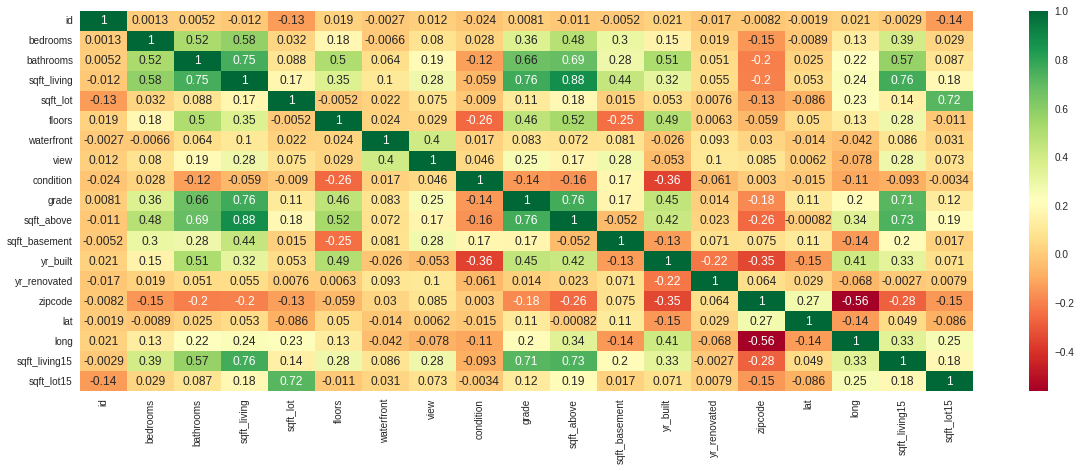

In [20]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(Multic.corr(), annot=True, cmap='RdYlGn')

'sqft_above' has very high correlation with 'sqft_living'.

In [21]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('price ~ id + bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15', data=dff).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2797.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:08:56   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21594   BIC:                         5.894e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.939e+06   2.93e+06      2.366      0.018    1.19e+06    1.27e+07
id            -1.289e-06   4.82e-07     -2.671      0.008   -2.23e-06   -3.43e-07
bedrooms      -3.576e+04   1891.574    -18.907      0.000   -3.95e+04   -3.21e+04
bathrooms      4.116e+04   3253.218     12.651      0.000    3.48e+04    4.75e+04
sqft_living     110.3944      2.269     48.646      0.000     105.946     114.842
sqft_lot          0.1218      0.048      2.539      0.011       0.028       0.216
floors         6764.7563   3595.459      1.881      0.060    -282.608    1.38e+04
waterfront     5.827e+05   1.74e+04     33.567      0.000    5.49e+05    6.17e+05
view           5.303e+04   2140.594     24.774      0.000    4.88e+04    5.72e+04
condition      2.625e+04   2351.639     11.164      0.000    2.16e+04    3.09e+04
grade          9.601e+04   2152.926     44.594      0.000    9.18e+04       1e+05
sqft_above       70.6928      2.253     31.373      0.000      66.276      75.109
sqft_basement    39.7094      2.646     15.006      0.000      34.522      44.896
yr_built      -2622.2522     72.653    -36.093      0.000   -2764.657   -2479.847
yr_renovated     19.6458      3.656      5.374      0.000      12.481      26.811
zipcode        -582.2481     32.981    -17.654      0.000    -646.894    -517.603
lat            6.024e+05   1.07e+04     56.115      0.000    5.81e+05    6.23e+05
long          -2.128e+05   1.32e+04    -16.179      0.000   -2.39e+05   -1.87e+05
sqft_living15    21.6256      3.447      6.273      0.000      14.869      28.383
sqft_lot15       -0.3964      0.073     -5.398      0.000      -0.540      -0.252
==============================================================================
Omnibus:                    18406.018   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1881616.153
Skew:                           3.571   Prob(JB):                         0.00
Kurtosis:                      48.149   Cond. No.                     3.03e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.89e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Attempting after dropping column 'sqft_above' as correlation is high. The P value for variable 'floors' is high but the 'floor' information is important for house buyers.

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = Multic.drop(['sqft_above'], axis=1)
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables       VIF
0              id  3.631516
1        bedrooms  1.646296
2       bathrooms  3.350310
3     sqft_living  6.041390
4        sqft_lot  2.104055
5          floors  1.951001
6      waterfront  1.203729
7            view  1.420035
8       condition  1.220353
9           grade  3.394319
10  sqft_basement  1.948351
11       yr_built  2.128890
12   yr_renovated  1.144733
13        zipcode  0.486697
14            lat  1.180261
15           long  1.810062
16  sqft_living15  2.882937
17     sqft_lot15  2.142654

VIF for all are less than 10 now after dropping columns.

In [23]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('price ~ id + bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15', data=dff).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2797.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        21:08:57   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21594   BIC:                         5.894e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.939e+06   2.93e+06      2.366      0.018    1.19e+06    1.27e+07
id            -1.289e-06   4.82e-07     -2.671      0.008   -2.23e-06   -3.43e-07
bedrooms      -3.576e+04   1891.574    -18.907      0.000   -3.95e+04   -3.21e+04
bathrooms      4.116e+04   3253.218     12.651      0.000    3.48e+04    4.75e+04
sqft_living     181.0872      3.668     49.371      0.000     173.898     188.277
sqft_lot          0.1218      0.048      2.539      0.011       0.028       0.216
floors         6764.7563   3595.459      1.881      0.060    -282.608    1.38e+04
waterfront     5.827e+05   1.74e+04     33.567      0.000    5.49e+05    6.17e+05
view           5.303e+04   2140.594     24.774      0.000    4.88e+04    5.72e+04
condition      2.625e+04   2351.639     11.164      0.000    2.16e+04    3.09e+04
grade          9.601e+04   2152.926     44.594      0.000    9.18e+04       1e+05
sqft_basement   -30.9834      4.360     -7.106      0.000     -39.529     -22.437
yr_built      -2622.2522     72.653    -36.093      0.000   -2764.657   -2479.847
yr_renovated     19.6458      3.656      5.374      0.000      12.481      26.811
zipcode        -582.2481     32.981    -17.654      0.000    -646.894    -517.603
lat            6.024e+05   1.07e+04     56.115      0.000    5.81e+05    6.23e+05
long          -2.128e+05   1.32e+04    -16.179      0.000   -2.39e+05   -1.87e+05
sqft_living15    21.6256      3.447      6.273      0.000      14.869      28.383
sqft_lot15       -0.3964      0.073     -5.398      0.000      -0.540      -0.252
==============================================================================
Omnibus:                    18406.018   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1881616.153
Skew:                           3.571   Prob(JB):                         0.00
Kurtosis:                      48.149   Cond. No.                     1.16e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The accuracy for this model is 70%.

In [24]:
#Dopping the unecessary features as discussed above
dfdf = dff.drop(['date', 'sqft_above'], axis=1)
dfdf

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  221900.0         3       1.00         1180      5650   
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21608   263000018  360000.0         3       2.50         1530      1131   
21609  6600060120  400000.0         4       2.50         2310      5813   
21610  1523300141  402101.0         2       0.75         1020      1350   
21611   291310100  400000.0         3       2.50         1600      2388   
21612  1523300157  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_basement  yr_built  \
0         1.0           0     0          3      7              0      1955   
1         2.0           0     0          3      7            400      1951   
2         1.0           0     0          3      6              0      1933   
3         1.0           0     0          5      7            910      1965   
4         1.0           0     0          3      8              0      1987   
...       ...         ...   ...        ...    ...            ...       ...   
21608     3.0           0     0          3      8              0      2009   
21609     2.0           0     0          3      8              0      2014   
21610     2.0           0     0          3      7              0      2009   
21611     2.0           0     0          3      8              0      2004   
21612     2.0           0     0          3      7              0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0                 0    98178  47.5112 -122.257           1340        5650  
1              1991    98125  47.7210 -122.319           1690        7639  
2                 0    98028  47.7379 -122.233           2720        8062  
3                 0    98136  47.5208 -122.393           1360        5000  
4                 0    98074  47.6168 -122.045           1800        7503  
...             ...      ...      ...      ...            ...         ...  
21608             0    98103  47.6993 -122.346           1530        1509  
21609             0    98146  47.5107 -122.362           1830        7200  
21610             0    98144  47.5944 -122.299           1020        2007  
21611             0    98027  47.5345 -122.069           1410        1287  
21612             0    98144  47.5941 -122.299           1020        1357  

[21613 rows x 19 columns]

A table of correlations makes up the correlation matrix. The values in the table are associated with one another across all random variables. The pairs with the highest correlation may be seen using this. By denoting the positive and negative signs, it also reveals whether the relationship is directly dependent or inversely dependent.

In [25]:
#Calculating correlation matrix for all variables
dfdf.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   

                 floors  waterfront      view  condition     grade  \
id             0.018525   -0.002721  0.011592  -0.023783  0.008130   
price          0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms       0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms      0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living    0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot      -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors         1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront     0.023698    1.000000  0.401857   0.016653  0.082775   
view           0.029444    0.401857  1.000000   0.045990  0.251321   
condition     -0.263768    0.016653  0.045990   1.000000 -0.144674   
grade          0.458183    0.082775  0.251321  -0.144674  1.000000   
sqft_basement -0.245705    0.080588  0.276947   0.174105  0.168392   
yr_built       0.489319   -0.026161 -0.053440  -0.361417  0.446963   
yr_renovated   0.006338    0.092885  0.103917  -0.060618  0.014414   
zipcode       -0.059121    0.030285  0.084827   0.003026 -0.184862   
lat            0.049614   -0.014274  0.006157  -0.014941  0.114084   
long           0.125419   -0.041910 -0.078400  -0.106500  0.198372   
sqft_living15  0.279885    0.086463  0.280439  -0.092824  0.713202   
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406  0.119248   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
id                 -0.005151  0.021380     -0.016907 -0.008224 -0.001891   
price               0.323816  0.054012      0.126434 -0.053203  0.307003   
bedrooms            0.303093  0.154178      0.018841 -0.152668 -0.008931   
bathrooms           0.283770  0.506019      0.050739 -0.203866  0.024573   
sqft_living         0.435043  0.318049      0.055363 -0.199430  0.052529   
sqft_lot            0.015286  0.053080      0.007644 -0.129574 -0.085683   
floors             -0.245705  0.489319      0.006338 -0.059121  0.049614   
waterfront          0.080588 -0.026161      0.092885  0.030285 -0.014274   
view                0.276947 -0.053440      0.103917  0.084827  0.006157   
condition           0.174105 -0.361417     -0.060618  0.003026 -0.014941   
grade               0.168392  0.446963      0.014414 -0.184862  0.114084   
sqft_basement       1.000000 -0.133124      0.071323  0.074845  0.110538   
yr_built   

Text(0.5, 1.0, 'Variable Correlation')

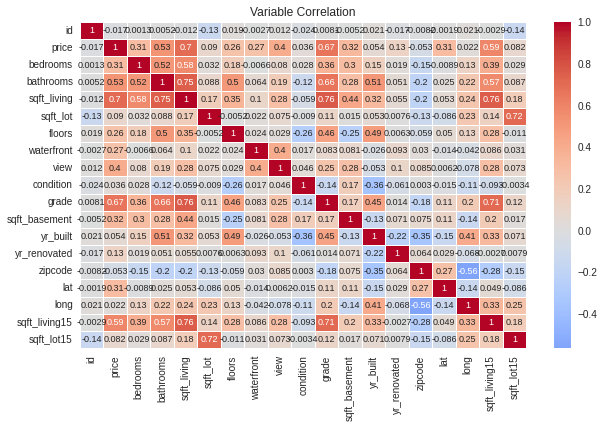

In [26]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfdf.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical way.



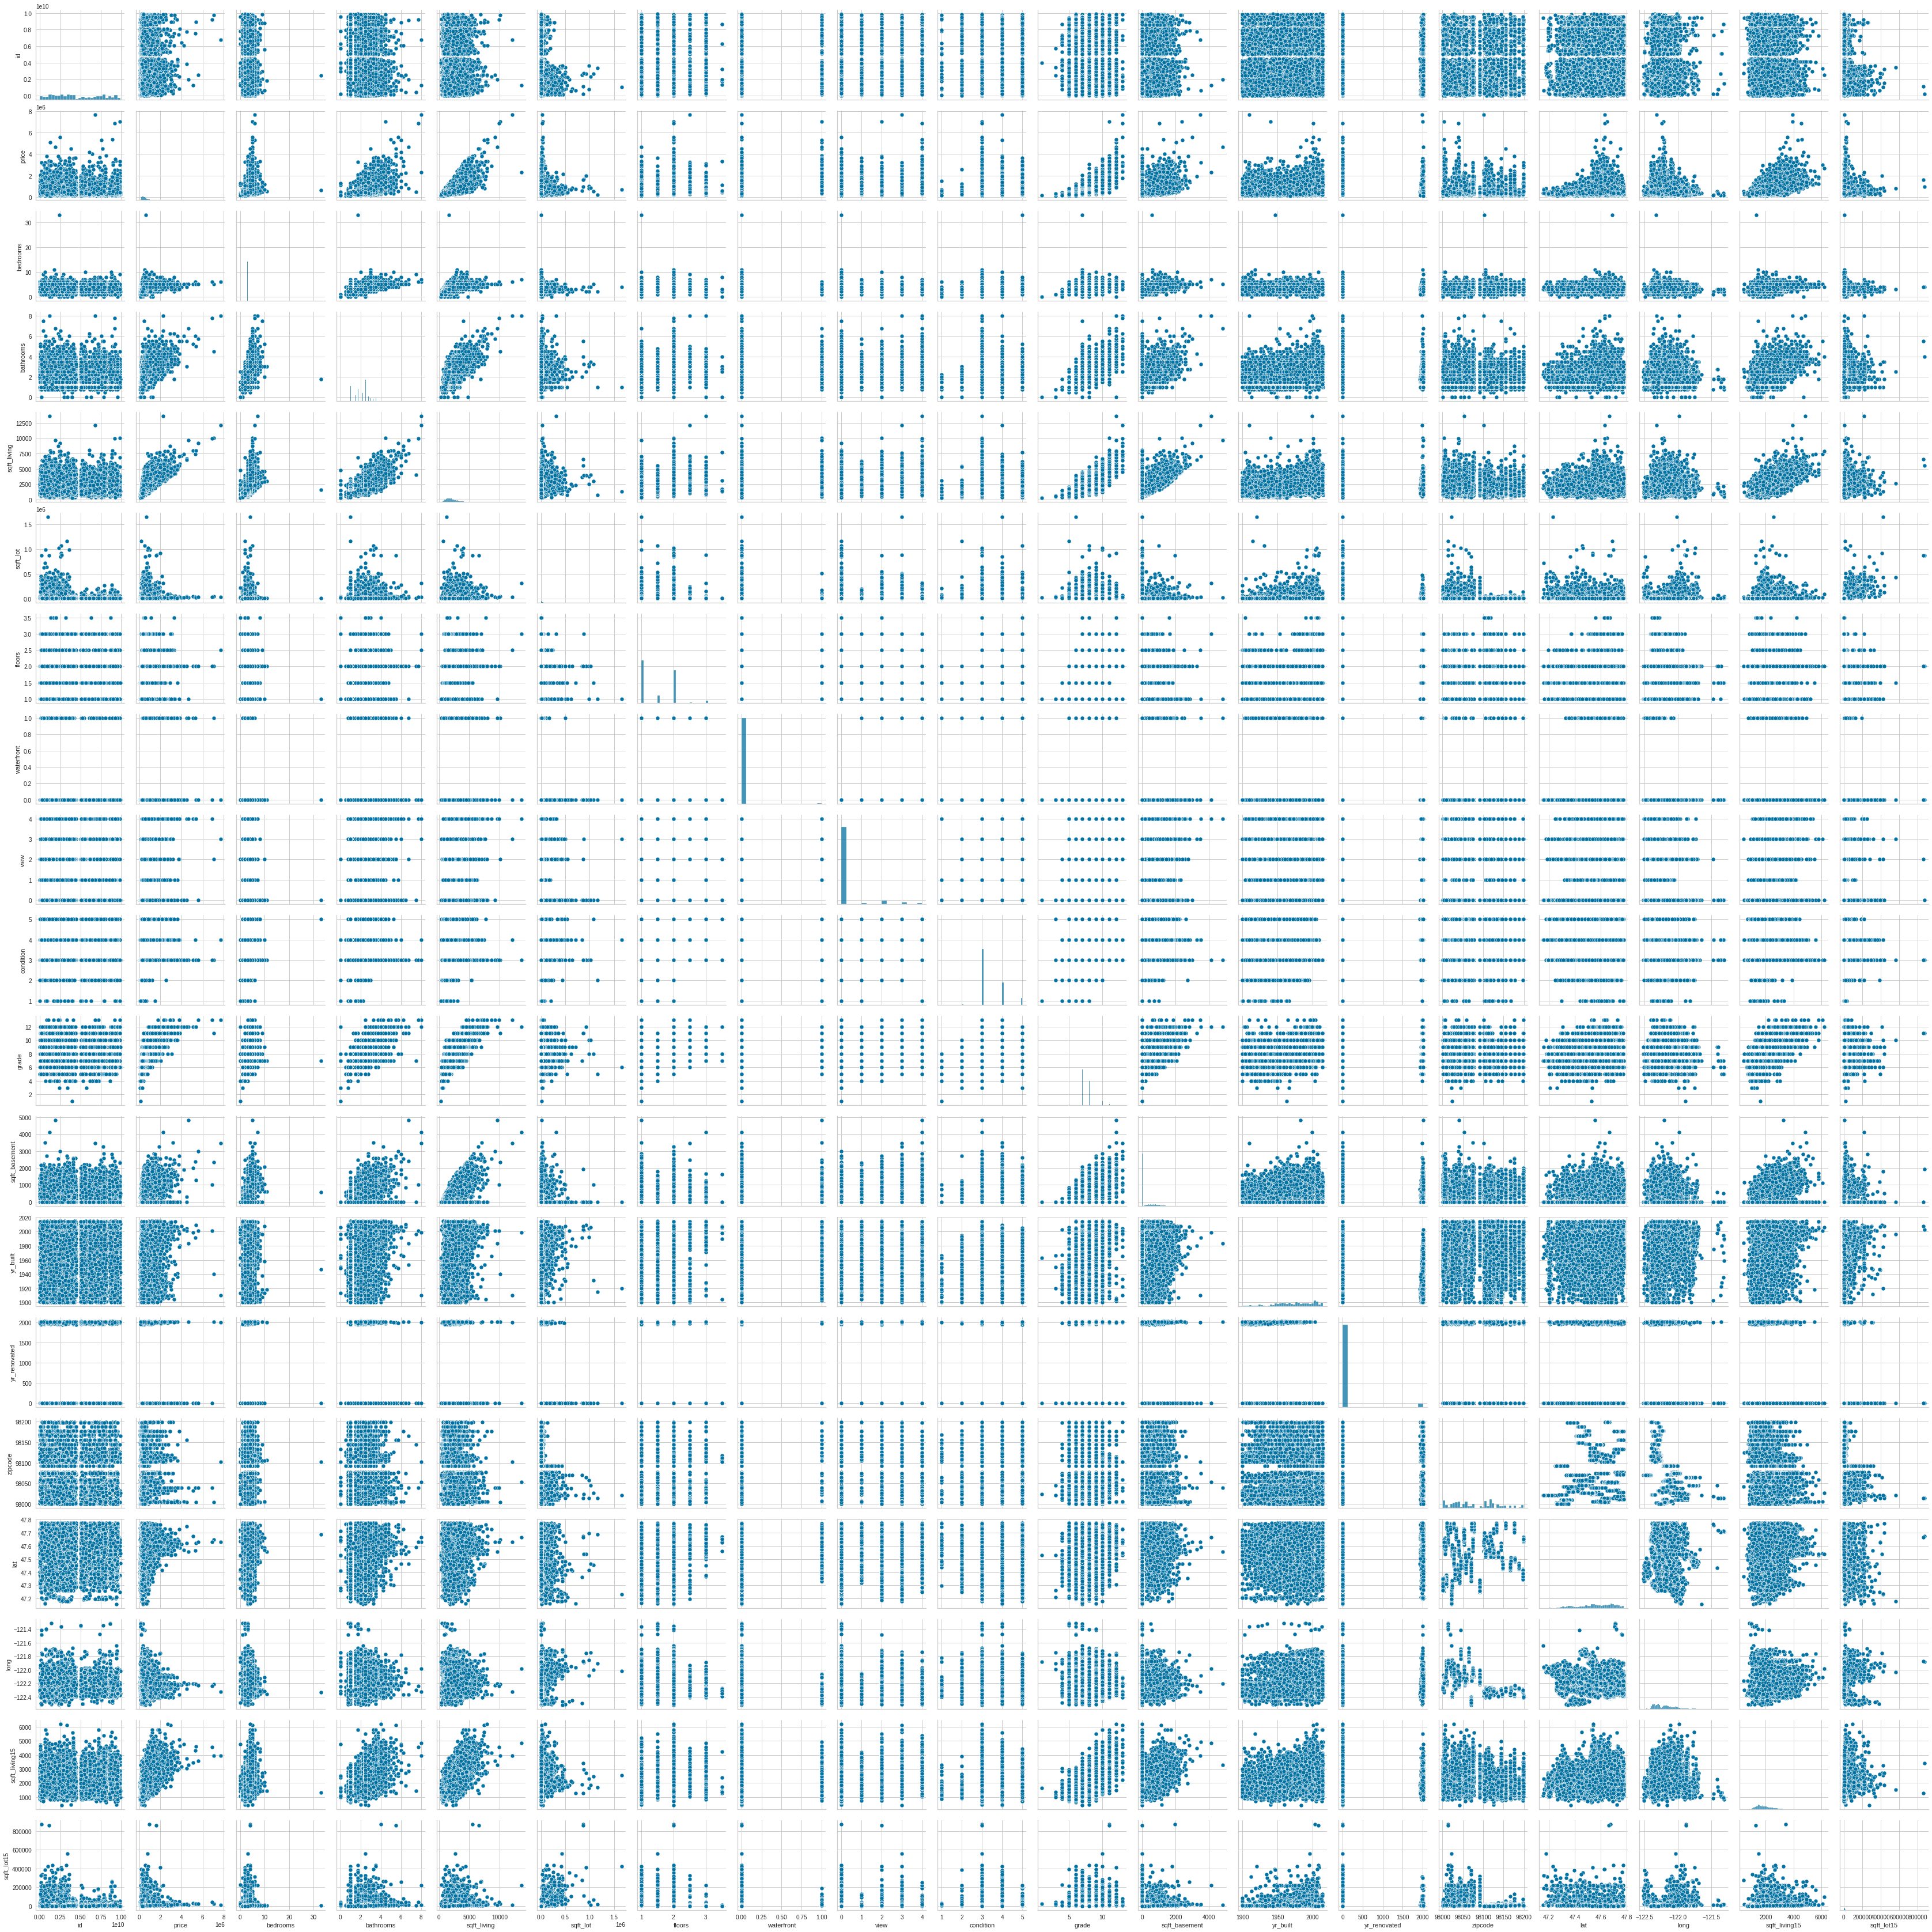

In [27]:
sns.pairplot(dfdf)

When plotted against price the variables 'sqft_living15', 'sqft_living' and 'bathrooms' has linear correlation.

# H20 AutoML Rexecution on new model

Dropping the variables that are not significant for determining Price. Passing this new model again through H20AutoML. Here, we are repeating the entire process exactly as above whilst ignoring the unecessary features.

In [28]:
df1=df.drop(['date', 'sqft_above'], axis=1)


In [29]:
df1_train, df1_test = df1.split_frame([pct_rows])

In [30]:
X1=df1.columns
print(X1)

['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [31]:
#Seperate Dependent variable from Independent variable
y1_numeric ='price'
X1.remove(y1_numeric) 
print(X1)

['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [32]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [33]:
aml1.train(x=X1,y=y1_numeric,training_frame=df1_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_2_AutoML_2_20230228_211211


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       8/12
# GBM base models (used / total)           4/5
# XGBoost base models (used / total)       3/3
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 5599796333.683944
RMSE: 74831.78692029172
MAE: 50339.78336022942
RMSLE: 0.14105981110427296
Mean Residual Deviance: 5599796333.683944
R^2: 0.9574399246327843
Null degrees of freedom: 10077
Residual degrees of freedom: 10069
Null deviance: 1326034001080459.8
Residual deviance: 56434747450866.78
AIC: 254830.87341875798

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 14127303393.749662
RMSE: 118858.33329535487
MAE: 66144.86046081486
RMSLE: 0.1683523214858852
Mean Residual Deviance: 14127303393.749662
R^2: 0.8951646098563489
Null degrees of freedom: 17331
Residual degrees of freedom: 17322
Null deviance: 2335774770727074.5
Residual deviance: 244854422420469.16
AIC: 454280.75981011457

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     66136.9      1658.67      68480.4       66725.2       66370.1       64781.3       64327.3
mean_residual_deviance  1.41249e+10  1.98393e+09  1.63159e+10   1.4358e+10    1.26861e+10   1.56735e+10   1.15909e+10
mse                     1.41249e+10  1.98393e+09  1.63159e+10   1.4358e+10    1.26861e+10   1.56735e+10   1.15909e+10
null_deviance           4.67155e+14  4.97938e+13  5.47677e+14   4.37877e+14   4.6335e+14    4.7024e+14    4.16631e+14
r2                      0.895221     0.00961228   0.896894      0.885759      0.903324      0.884778      0.905348
residual_deviance       4.89709e+13  6.93314e+12  5.64367e+13   5.00232e+13   4.47947e+13   5.41674e+13   3.94324e+13
rmse                    118609       8421.2       127734        119825        112633        125194        107661
rmsle                   0.16831      0.00376943   0.171883      0.172852      0.165865      0.166307      0.164642

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [34]:
print(aml1.leaderboard)

model_id                                                   rmse          mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_2_20230228_211211     118858  1.41273e+10  66144.9  0.168352               1.41273e+10
StackedEnsemble_BestOfFamily_2_AutoML_2_20230228_211211  120328  1.44788e+10  66544.3  0.169677               1.44788e+10
StackedEnsemble_AllModels_1_AutoML_2_20230228_211211     120675  1.45625e+10  65565.9  0.167427               1.45625e+10
StackedEnsemble_BestOfFamily_3_AutoML_2_20230228_211211  121259  1.47037e+10  67584.8  0.171209               1.47037e+10
GBM_2_AutoML_2_20230228_211211                           123093  1.51518e+10  67732.9  0.172719               1.51518e+10
GBM_5_AutoML_2_20230228_211211                           123787  1.53233e+10  70670.5  0.17944                1.53233e+10
GBM_4_AutoML_2_20230228_211211                           123854  1.53399e+10  66790.7  0.170291               1.53399e+10
GBM_3_AutoML_2_20230228_

In [35]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'StackedEnsemble_AllModels_2_AutoML_2_20230228_211211': 0,
 'StackedEnsemble_BestOfFamily_2_AutoML_2_20230228_211211': 1,
 'StackedEnsemble_AllModels_1_AutoML_2_20230228_211211': 2,
 'StackedEnsemble_BestOfFamily_3_AutoML_2_20230228_211211': 3,
 'GBM_2_AutoML_2_20230228_211211': 4,
 'GLM_1_AutoML_2_20230228_211211': 19}

In [36]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

4


In [37]:

best_model1.algo

'gbm'

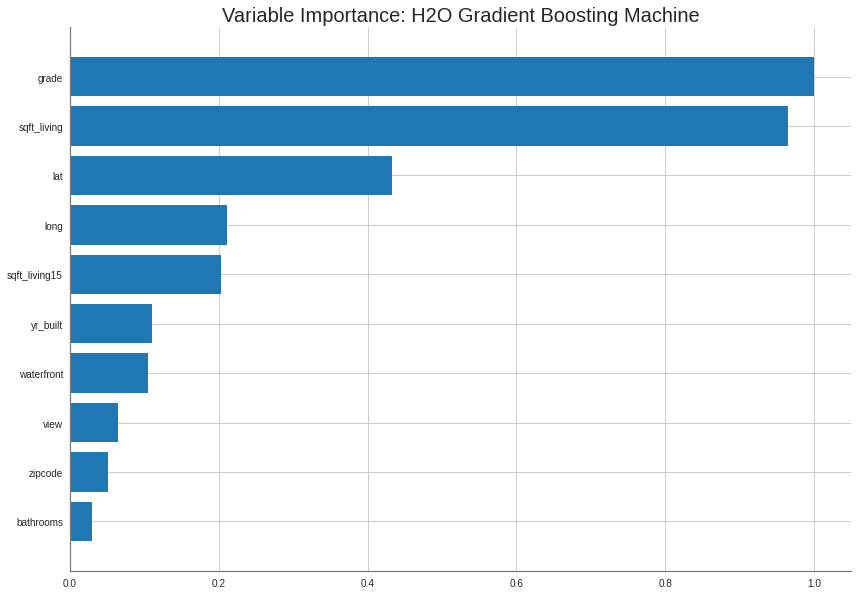

<Figure size 576x396 with 0 Axes>

In [38]:
#plot variables in order of their importance for price prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

19
glm


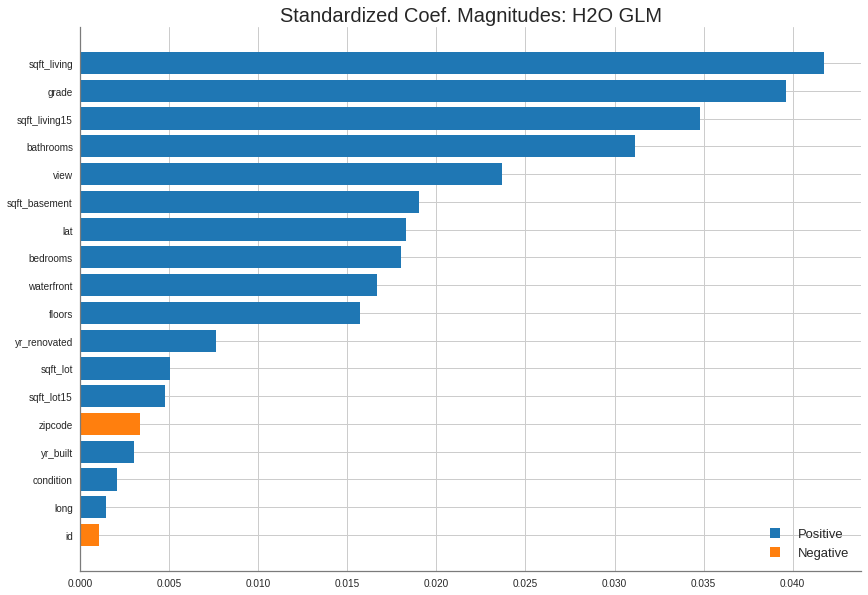

In [39]:
if glm_index is not 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml1.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo) 
  glm_model1.std_coef_plot()

From the above results, we observe that except for 'zipcode' and 'id' all are important features.

# Checking if assumptions violated

Checking if the model has violated any assumptions. For linear regression some of the assumptions are:

(1)There needs to be linear relation between the independent and dependent variable.

(2)Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.

(3)Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.

(4)There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.

In [40]:
#Seperating the predictor and target variables
A=dfdf.drop(['price'],axis=1)
B=dfdf['price']

In [41]:
#Splitting the data
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

In [42]:
dfdf.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [43]:
cols1 = ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15']
model1 = sm.OLS(b_train,sm.add_constant(A_train[cols1])).fit()

In [44]:

b_pred = model1.predict(sm.add_constant(A_train[cols1]))

In [45]:
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.6270865087799767e-05


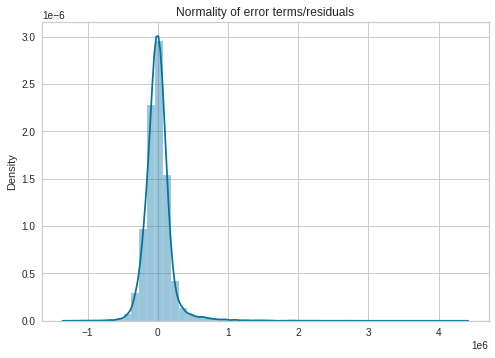

In [46]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')
     

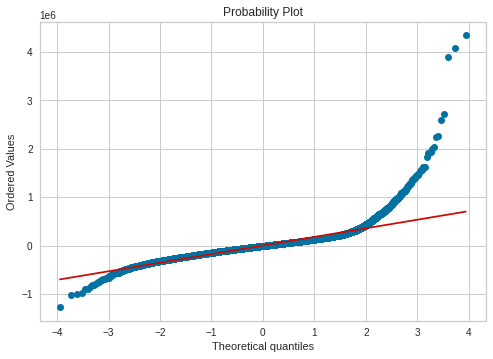

In [47]:
import pylab 
import scipy.stats as stats   
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

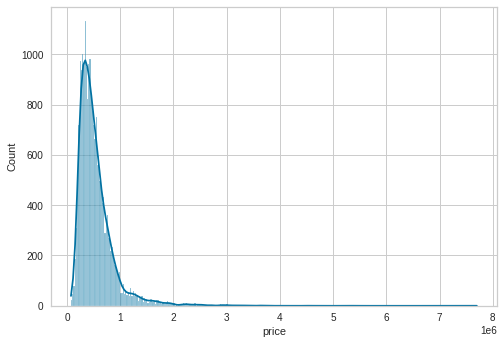

In [48]:
sns.histplot(dfdf.price, kde = True)

Ideally for the scatterplot the result should be scattered and it should not have any particular pattern.When the same is plotted as distplot it should follow a bell curve pattern.Both the plots give the expected result so even this assumptions are satisfied.

# Ridge Regularization in H20

Regression's primary goal is to identify patterns in the underlying dataset and generalize them in order to forecast the target value for a few additional independent values. Nonetheless, the target dataset may occasionally contain some random noise. Even though the training set may not include any mistakes, the test dataset's predictions of the proper target values will have significant errors. Regularization is done to avoid this circumstance. Regularization is a method for fine-tuning the random noise function by including an extra term. This extra term regulates the function's excessive fluctuation so that neither the coefficients nor the target value prediction for test data are drastically impacted. Ridge Regularization is utilized for this model.

Here, we use H2OGeneralizedLinearEstimator which would enable us to fit a generalized linear model, specified by a response variable, a set of predictors and a description of the error distribution.

In [49]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [50]:
house_glm_regularization.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677618272250_41


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  18                            18                             1                       py_9_sid_a96f

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 39726044339.702675
RMSE: 199313.93413332314
MAE: 125489.07426790847
RMSLE: NaN
Mean Residual Deviance: 39726044339.702675
R^2: 0.7052023842668167
Null degrees of freedom: 17331
Residual degrees of freedom: 17313
Null deviance: 2335608443722636.0
Residual deviance: 688531800495726.8
AIC: 472218.27414763666

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ------------------
    2023-02-28 21:16:04  0.000 sec   0             2335608443722636.0         134757006907.60652
    2023-02-28 21:16:04  0.058 sec   1                                                            199313.93413332314  39726044339.702675   125489.07426790847  0.7052023842668167

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
sqft_living    166464                 1                    0.224684
grade          111685                 0.670924             0.150746
lat            83813.9                0.503496             0.113128
yr_built       80817.9                0.485498             0.109084
waterfront     53438.3                0.32102              0.0721282
view           40427.5                0.242861             0.054567
bedrooms       33397.7                0.20063              0.0450784
zipcode        31800                  0.191032             0.0429219
bathrooms      31146.7                0.187108             0.0420402
long           29013.2                0.174291             0.0391605
condition      16457.3                0.0988638            0.0222131
sqft_living15  15994.7                0.0960853            0.0215889
sqft_basement  15381.4                0.0924008            0.020761
sqft_lot15     9428.16                0.0566378            0.0127256
yr_renovated   8383.14                0.0503601            0.0113151
floors         6064.87                0.0364335            0.00818604
sqft_lot       4651.09                0.0279405            0.0062778
id             2514.92                0.0151079            0.0033945

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [51]:
#Model details without regularization
house_glm.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677618272250_42


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              18                            18                             1                       py_9_sid_a96f

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 39725883208.70272
RMSE: 199313.52991882592
MAE: 125546.17576736918
RMSLE: NaN
Mean Residual Deviance: 39725883208.70272
R^2: 0.7052035799820054
Null degrees of freedom: 17331
Residual degrees of freedom: 17313
Null deviance: 2335608443722636.0
Residual deviance: 688529007773235.5
AIC: 472218.2038479579

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ------------------
    2023-02-28 21:16:04  0.000 sec   0             2335608443722636.0         134757006907.60652
    2023-02-28 21:16:04  0.155 sec   1                                                            199313.52991882592  39725883208.70272    125546.17576736918  0.7052035799820054

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
sqft_living    167229                 1                    0.225366
grade          111726                 0.668102             0.150568
lat            83901.5                0.501716             0.11307
yr_built       80972.8                0.484204             0.109123
waterfront     53464.1                0.319706             0.0720509
view           40439                  0.241819             0.0544977
bedrooms       33592.9                0.20088              0.0452715
zipcode        31924.5                0.190903             0.043023
bathrooms      31071.3                0.185801             0.0418733
long           29084.2                0.173918             0.0391953
condition      16437                  0.0982904            0.0221513
sqft_living15  15646                  0.0935602            0.0210853
sqft_basement  15644.4                0.093551             0.0210832
sqft_lot15     9466.55                0.0566084            0.0127576
yr_renovated   8335.75                0.0498464            0.0112337
floors         5951.51                0.035589             0.00802056
sqft_lot       4632.14                0.0276994            0.00624251
id             2513.65                0.0150312            0.00338752

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

From the above results, the accuracy and other related variables were same for both the cases. When dataset was regularized and when dataset was not regularized. This tells that for this specific model regularization does not help.

# Data Report

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                   rmse          mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  ------  -----------  --------  --------  ------------------------  ------------------  -------------------------  ---------------
GBM_5_AutoML_2_20230228_211211                           127373  1.62239e+10   71449.5  0.17945                1.62239e+10                1449                   0.020229  GBM
StackedEnsemble_AllModels_2_AutoML_2_20230228_211211     130629  1.70638e+10   68664.5  0.172521               1.70638e+10                1327                   0.149812  StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20230228_211211  131356  1.72544e+10   69732.7  0.175576               1.72544e+10                 886                   0.065423  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_2_20230228_211211  134865  1.81885e+10   70400.1  0.175432               1.81885e+10                 540                   0.051929  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20230228_211211     136493  1.86303e+10   68330    0.171916               1.86303e+10                1642                   0.206014  StackedEnsemble
GBM_4_AutoML_2_20230228_211211                           136723  1.86931e+10   69274.2  0.173799               1.86931e+10                2913                   0.029885  GBM
GBM_1_AutoML_2_20230228_211211                           136907  1.87436e+10   70863.7  0.176726               1.87436e+10                8662                   0.07302   GBM
XGBoost_3_AutoML_2_20230228_211211                       137296  1.88501e+10   75265.2  0.18617                1.88501e+10                 798                   0.003859  XGBoost
StackedEnsemble_BestOfFamily_2_AutoML_2_20230228_211211  137867  1.90073e+10   69477.2  0.174195               1.90073e+10                 648                   0.053861  StackedEnsemble
GBM_2_AutoML_2_20230228_211211                           140132  1.96371e+10   70658.4  0.177156               1.96371e+10                2506                   0.032613  GBM
GBM_3_AutoML_2_20230228_211211                           142841  2.04035e+10   70637.3  0.175686               2.04035e+10                3929                   0.035726  GBM
XGBoost_1_AutoML_2_20230228_211211                       143585  2.06166e+10   75635.3  0.189602               2.06166e+10                2476                   0.009454  XGBoost
DRF_1_AutoML_2_20230228_211211                           145190  2.108e+10     75477.8  0.184861               2.108e+10                  3777                   0.015927  DRF
XGBoost_grid_1_AutoML_2_20230228_211211_model_1          146592  2.14891e+10   76047.7  0.186618               2.14891e+10                1716                   0.004415  XGBoost
XGBoost_2_AutoML_2_20230228_211211                       147749  2.18296e+10   75925.4  0.188841               2.18296e+10                1778                   0.007049  XGBoost
XRT_1_AutoML_2_20230228_211211                           161818  2.6185e+10    89959.4  0.22301                2.6185e+10                 1669                   0.004073  DRF
DeepLearning_1_AutoML_2_20230228_211211                  169892  2.88632e+10   96458    0.2483                 2.88632e+10                 645                   0.007706  DeepLearning
GBM_grid_1_AutoML_2_20230228_211211_model_1              218157  4.75923e+10  131066    0.325453               4.75923e+10                 486                   0.007819  GBM
GBM_grid_1_AutoML_2_20230228_211211_model_2              341485  1.16612e+11  216538    0.505508               1.16612e+11                  40                   0.000736  GBM
GLM_1_AutoML_2_20230228_211211                           367224  1.34854e+11  234210    0.545198               1.34854e+11                  68                   0.001151  GLM
[20 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

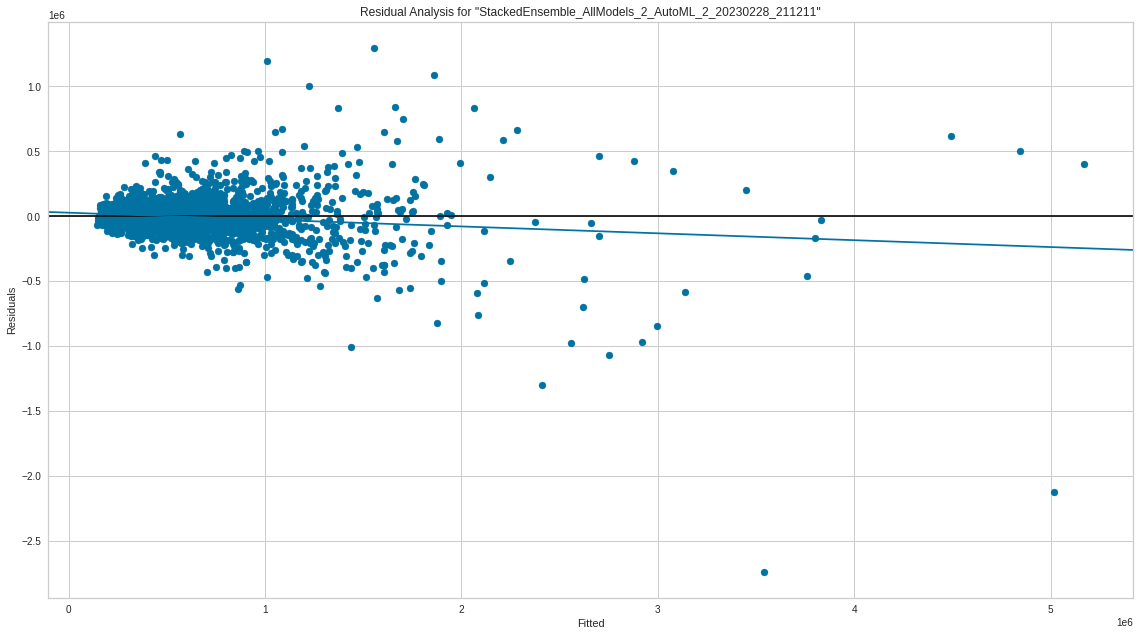

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

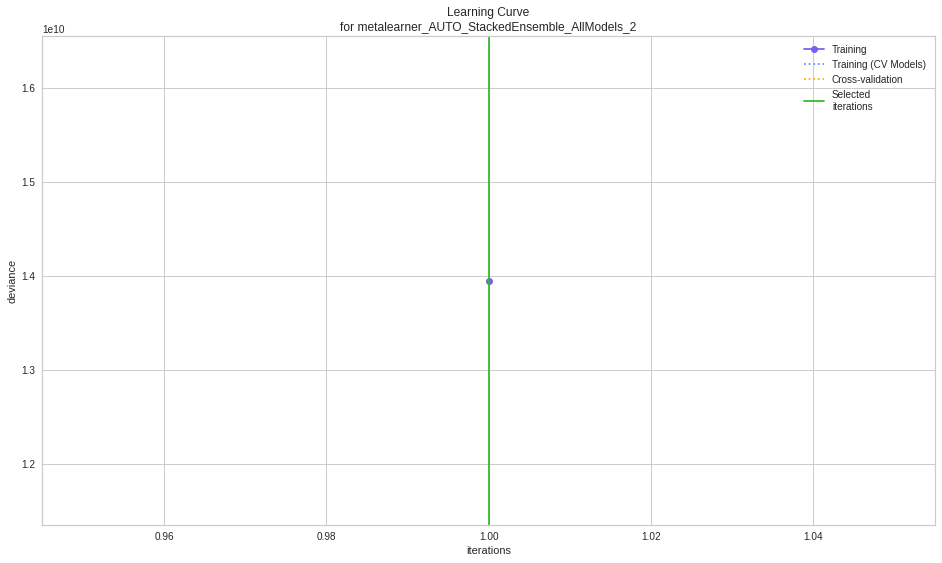

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

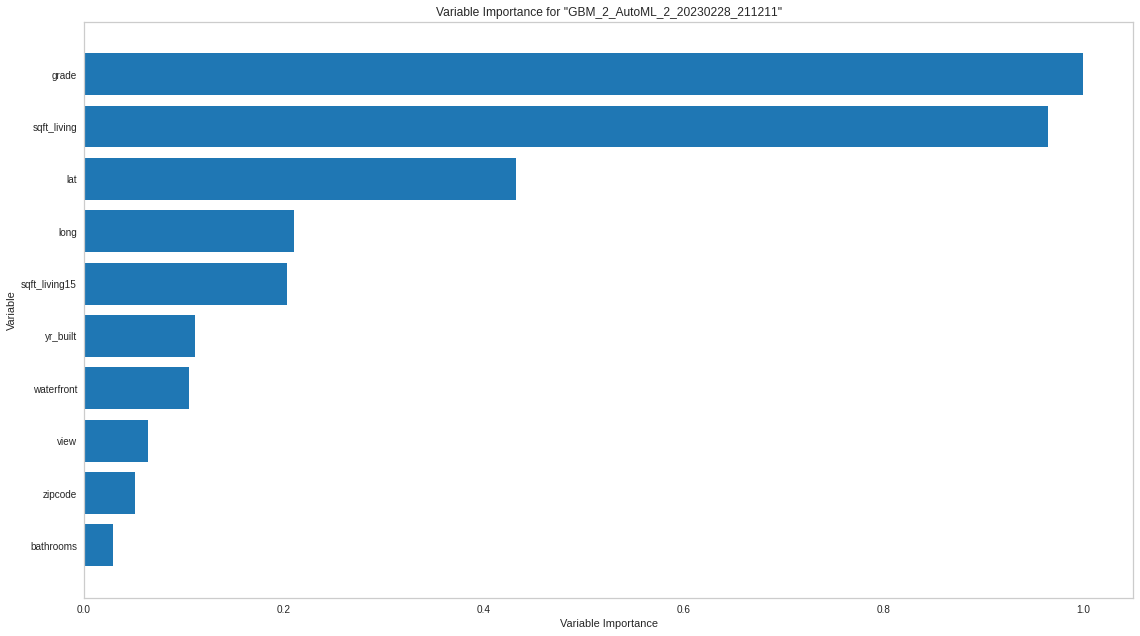

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

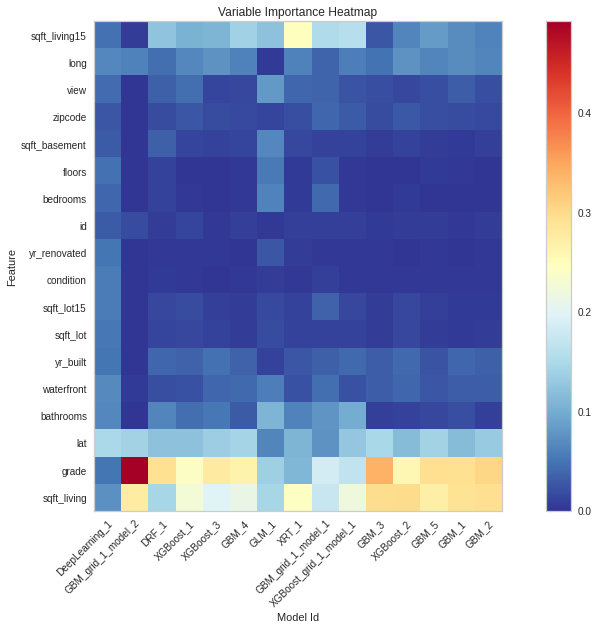

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

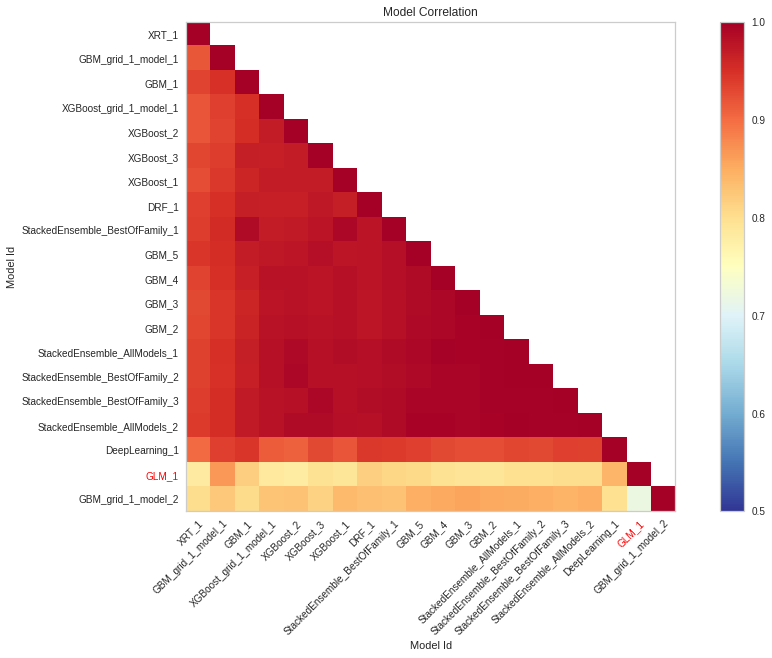

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

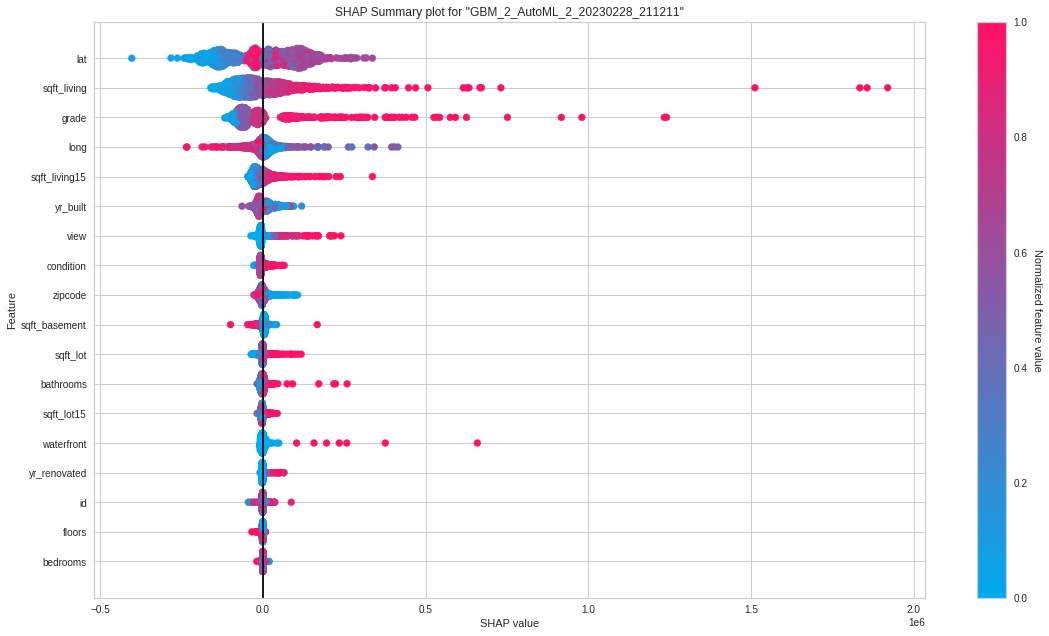

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

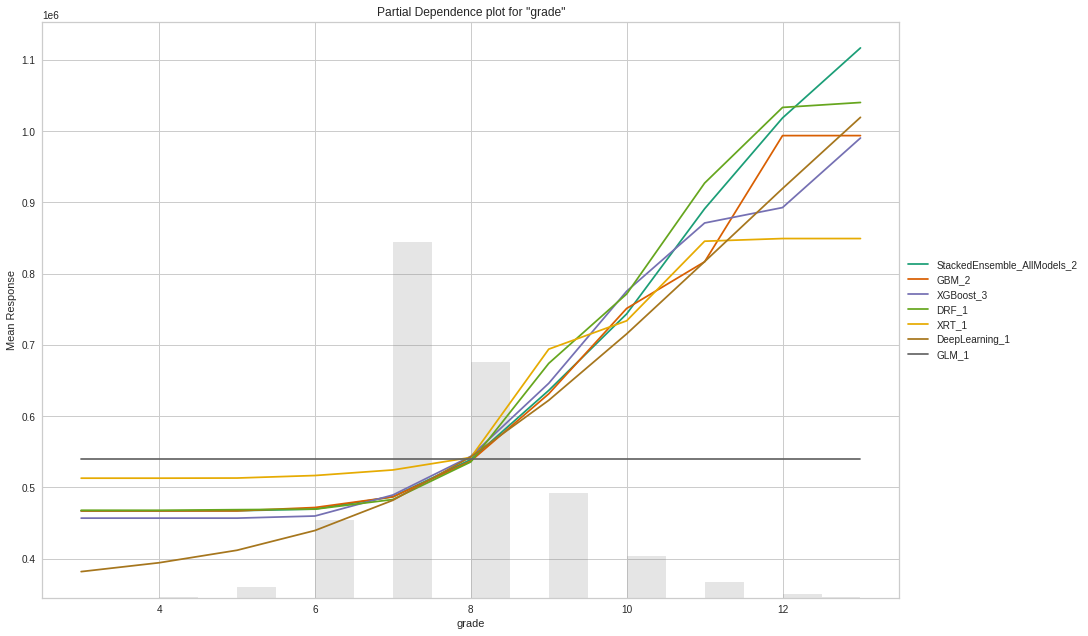

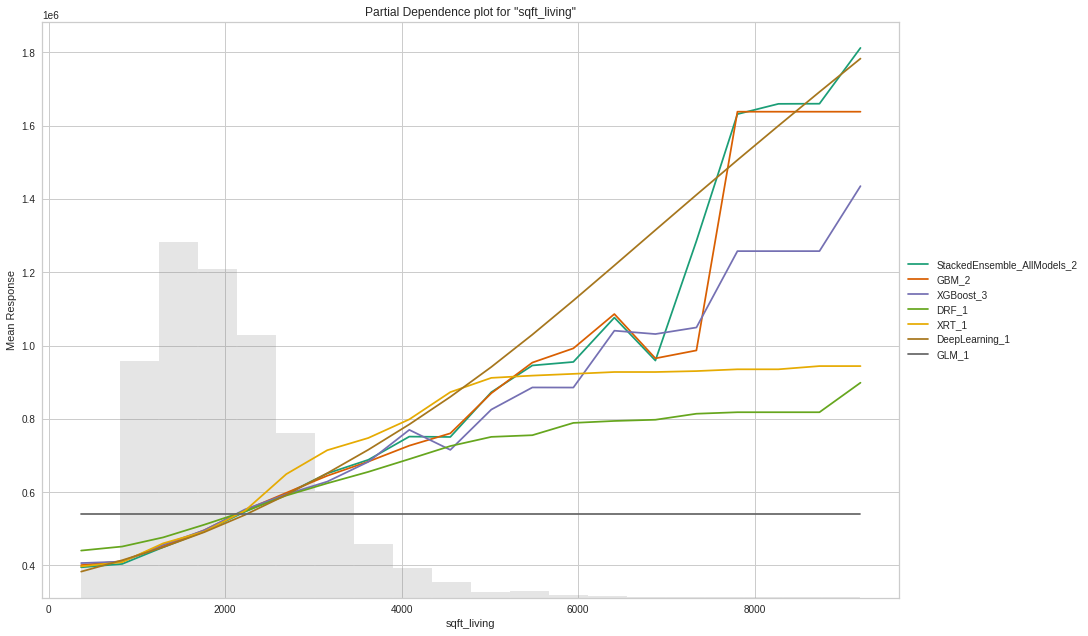

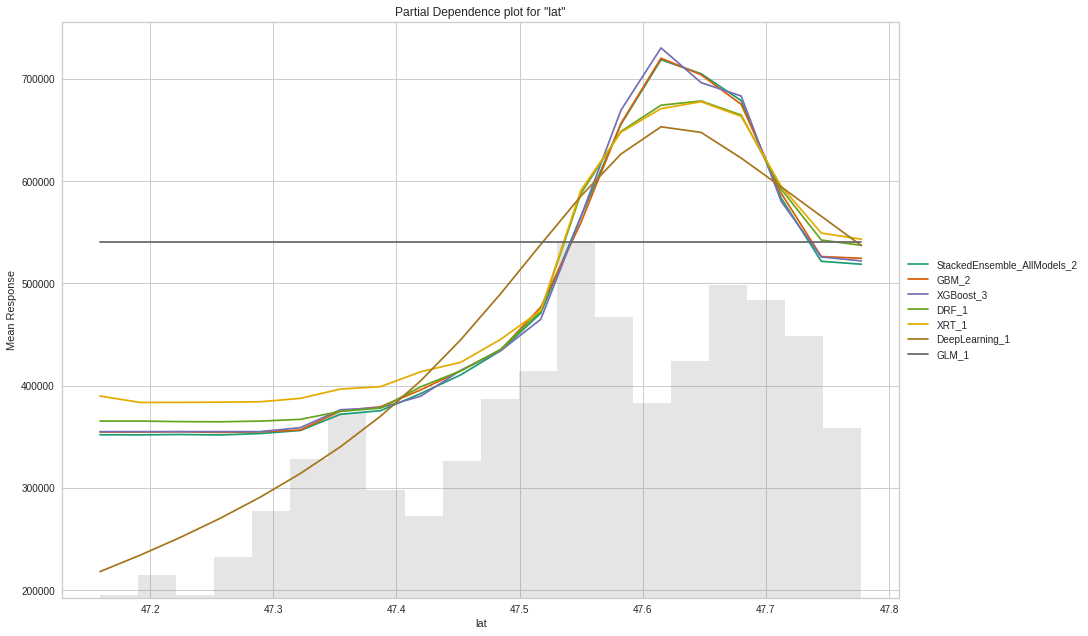

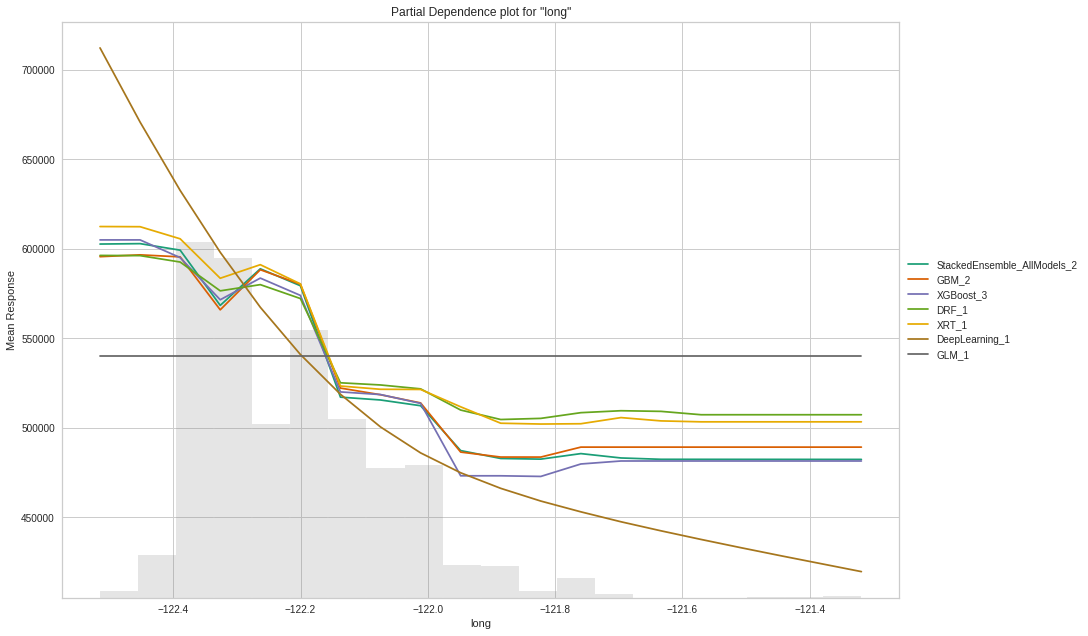

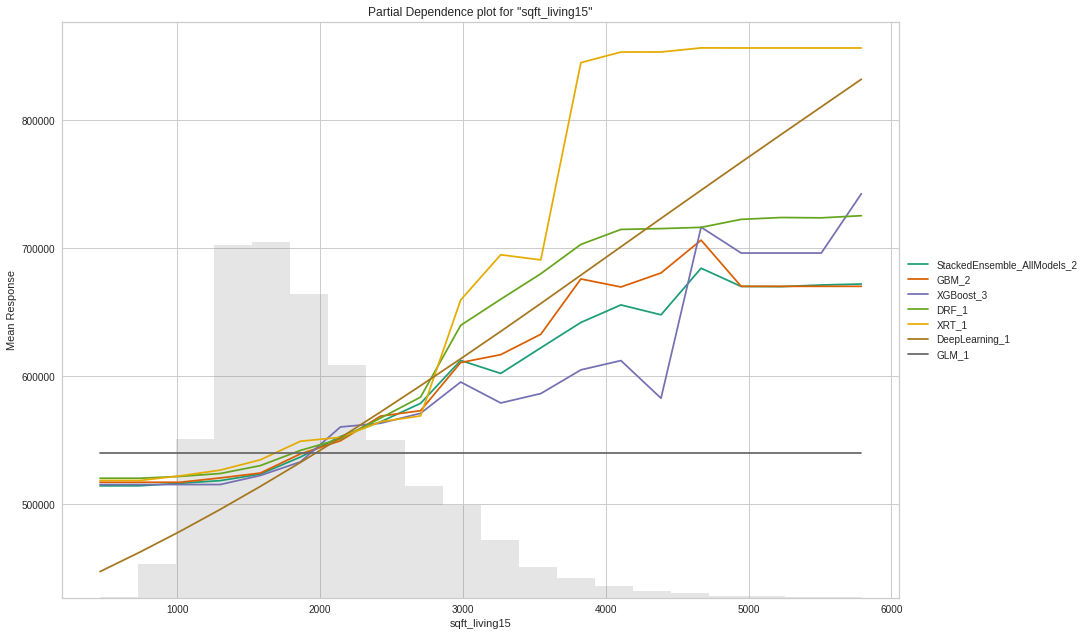

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

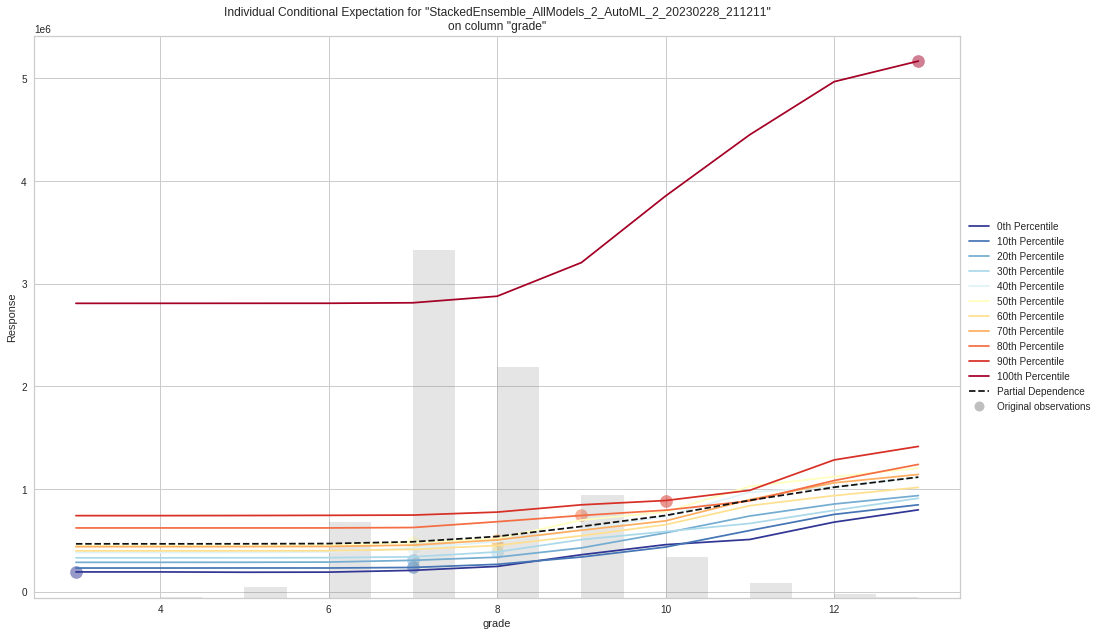

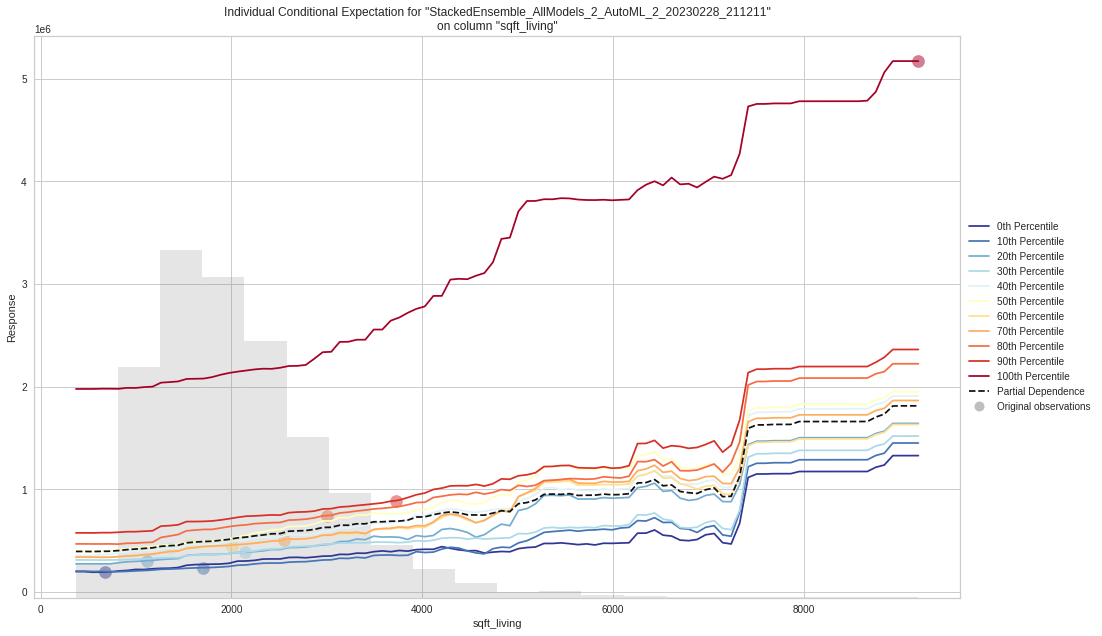

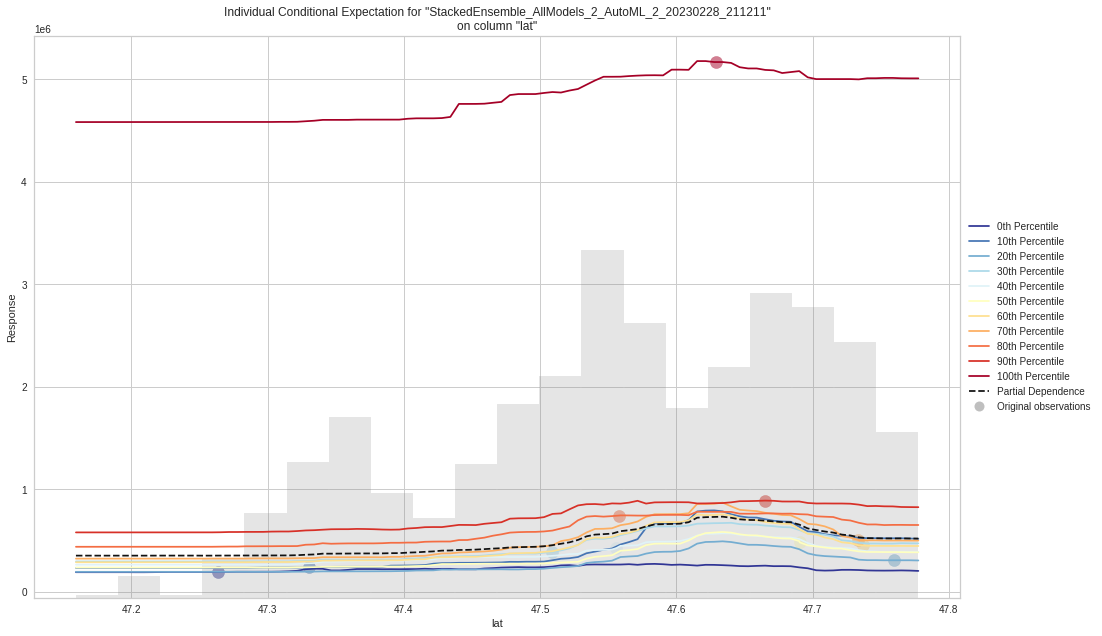

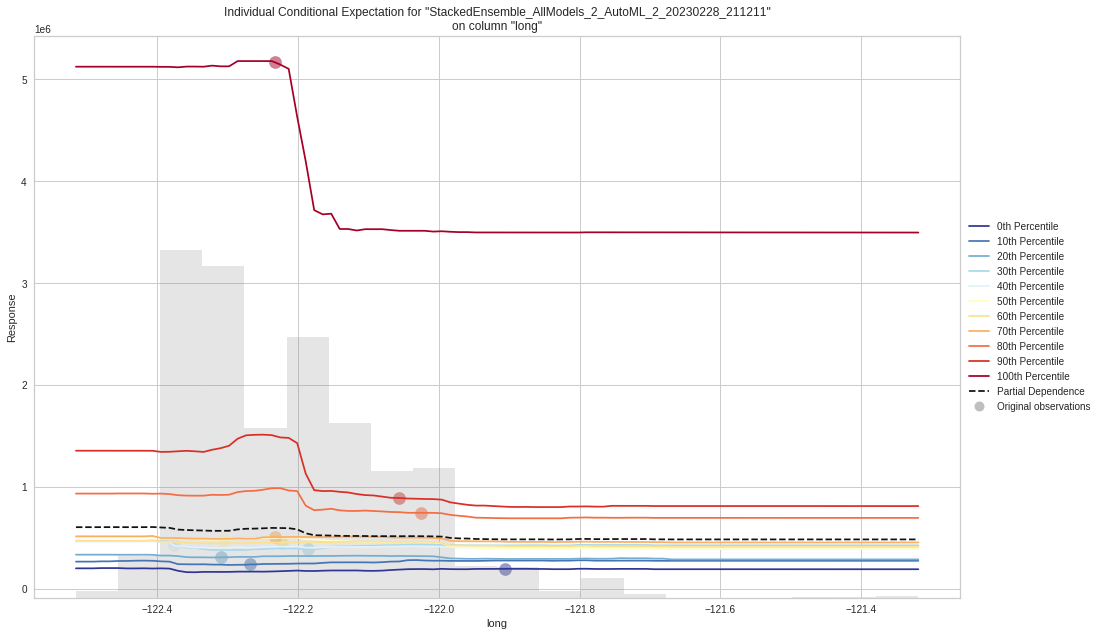

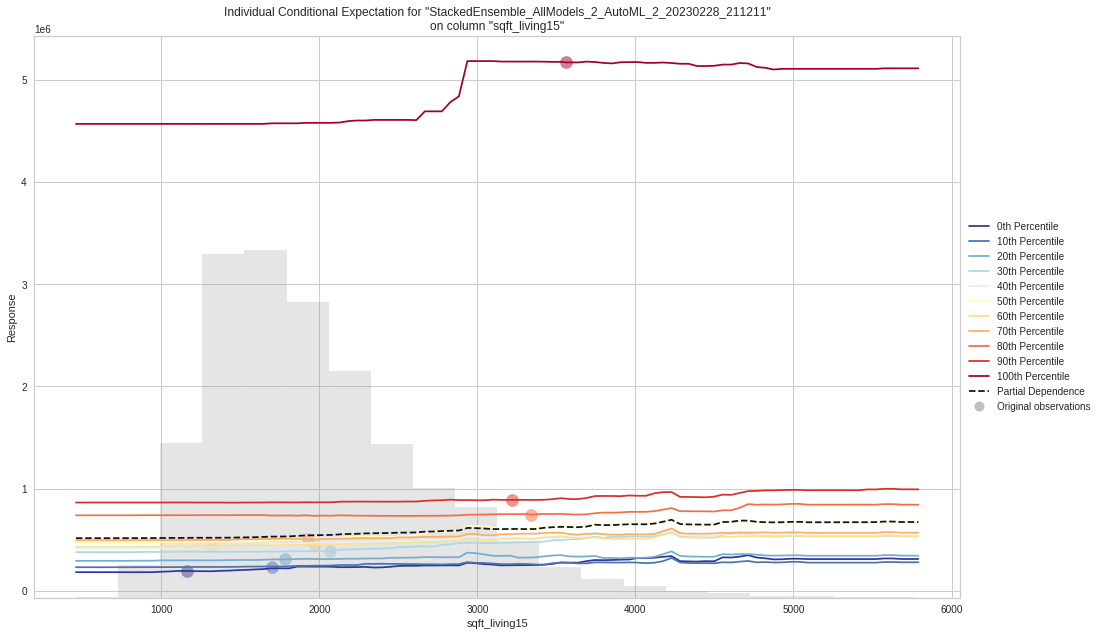

In [52]:
exa = aml1.explain(df1_test)

# Hyperparameter Tuning

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [53]:
s = dfdf['price']

t = dfdf.drop(['price'], axis = 1)

In [54]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [55]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)


In [56]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

In [57]:
random_rf.best_params_

{'n_estimators': 400, 'min_samples_split': 5, 'max_depth': 1100}

# Conclusion


A fundamental algorithm based on the linear regression method to predict housing prices was constructed. VIF, p-values and other tests were considered to ignore some of the independent variables. H20.ai framework was used to train and test the variables of the dataset of House Sales in King County, USA. This gave the best model as ‘gbm’ and accuracy for test data was 89.9%. The findings indicate that, to a certain extent, the suggested linear regression model can assess and forecast the home price. The model has to be improved in future studies as the prediction accuracy is admittedly still constrained in several areas. Several methods, such as reducing outliers and applying ensemble or booster, can assist produce improved prediction in subsequent study into the associated models.

# Assignment Question/Answers

Q1) Is the relationship significant? 

The term "statistically significant" refers to a relationship when the p value for the variables is less than 0.05. The probability that a result at least as bad as the current one would be obtained under the null hypothesis is known as the P value. When the p value is low, the null hypothesis can be ignored since there is little similarity between the two groups. For this model, there are two approaches to determine the P-value. From the OLS method it was observed that values for 'floors' was greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship **is significant**.

Q2) Are any model assumptions violated? 

Assumptions for linear regression are:

Linear relationship- By holding all other variables constant, the graph for the dependent and independent variables must be linear. Plotting the target variable against each independent variable, **linear relation is observed** for few of them. Hence this assumption is **not violated**.

Homoscedasticity, which denotes that the error distribution is normal - The residuals plot should have a bell-curve shape and be regularly distributed. For this model, **bell curve is achieved**. Hence, **not violated**.

No or little multicollinearity - This can be determined by correlation matrix. For this model some of the assumptions are violated.

Multicollinearity **exists between a few variables** such as sqft_living and bathrooms, sqft_living and grade and a few more variables. But, no autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation. **For this model the value is 1.9, therefore this assumption is not violated**.

Q3) Is there any multicollinearity in the model? 

Multicollinearity is present in a model when two independent variables are substantially connected with one another. It's a problem since it calls into question the independent variable's statistical significance. Calculating the correlation matrix or the VIF value for each variable may be used to identify multicollinearity. A coefficient in the correlation matrix that is closer to +1 or -1 indicates that the two variables are strongly connected. For VIF values, a number greater than 10 indicates the presence of multicollinearity. Several of the variables in this model have VIF values higher than 10 and p values higher than 0.05. The desired output was obtained by removing certain columns and double-checking the data. **Currently high correlation exists between few columns** such as sqft_living and bathrooms, sqft_living and grade, sqft_living15 andsqft_living.

Q4) In the multivariate models are predictor variables independent of all the other predictor variables? 

Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that sqft_living and bathrooms, sqft_living and grade, sqft_living15 andsqft_living are correlated to each other. Other than those **other predictors are independent from each other**.

Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model. 

From the variable importance plot, the most to least important variables are displayed. For my model **sqft_living, grade, lat and yr_built are top 4 most important variables** to determine Price. VIF and p-values for date, sqft_above, floors was high than the ideal values. **date and sqft_above variables were excluded** from the model as number of floors is vital for house buyers.

Q6) Does the model make sense? 

A model must satisfy all of the assumptions and have a p value and VIF that fall within the appropriate ranges in order to be valid. In light of the target variable's lowest and maximum values, RMSE should be as low as feasible. Other than that, R2 should be good. **R2 of this model is 0.70 which is considered good in terms of accuracy**. The model makes sense as a whole. Depending on their significance, several extra factors can be eliminated to improve accuracy. Outliers can also be eliminated, or boosting, or an ensemble model can be utilized.

Q7)Does regularization help? 

Regularization is a method for fine-tuning the random noise function by including an extra term. This extra term regulates the function's excessive fluctuation so that neither the coefficients nor the target value prediction for test data are drastically impacted. Regularization is primarily used to reduce validation loss and attempt to increase model correctness. Ridge Regularization was applied to the training set of this model. It was observed that **Root Mean Square Error (RMSE) and R2** was calculated twice, once when regularization was not applied and once when regularization was applied. The **values were same in both the cases**. Hence it can be concluded that for this model **regularization does not help**.

Q8) Which independent variables are significant? 

Variables are significant when p-value is less than 0.05. For this model **except for ‘floor' all other variables** have p-value less than 0.05. So, it can be said that all variables are significant.

Q9) Which hyperparameters are important? 

Hyperparameter tuning is used to determine the optimal configuration of a hyperparameter and combinations of interacting hyperparameters for a particular dataset. It looks objectively through several choices for model hyperparameters and selects a subset that produces a model that performs the best on a certain dataset. For this model tuning is performed using **RandomForestRegressor**. The best hyperparameters for this model are:- **'n_estimators': 400, 'min_samples_split': 5, 'max_depth': 1100**

# LICENSE
LICENSE

Copyright <2022> Sonali Mondal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Reference

[1]https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

[2]https://www.sigmamagic.com/blogs/what-is-variance-inflation-factor/

[3]https://deepnote.com/@jayjburgess/BigMart-Sales-Analysis-a3feccc6-e63d-4c9d-99ac-93f70845f92a

[4]https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/discussion/207885


